In [54]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [55]:
DF_Train = pd.read_csv('Train.csv')
DF_Test = pd.read_csv('Test.csv')

print(DF_Train.shape)
print(DF_Test.shape)
print(DF_Train.columns)
print(DF_Test.columns)
DF_Train.head(n=5)

(1600, 6)
(400, 5)
Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'target'],
      dtype='object')
Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5'], dtype='object')


,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [56]:
DF_Train = DF_Train.values
DF_Test = DF_Test.values

X_Train = DF_Train[:,:-1]
Y_Train = DF_Train[:,-1]
X_Test = DF_Test[:,:]

print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)
print(Y_Train)

(1600, 5)
(1600,)
(400, 5)
[ -82.15466656  -48.89796018   77.2703707  ... -107.51050797  -47.34155781
 -115.93900296]


In [57]:
# Normalising Data
u = np.mean(X_Train, axis = 0)
std = np.std(X_Train, axis = 0)
print(std)

X_Train = (X_Train - u)/std
print(X_Train)

[0.99702582 1.02145636 1.01145129 1.01687155 0.97834768]
[[ 0.29016495 -0.89871183 -0.37238147  0.44177059  0.52502448]
 [-0.84270473 -0.15822922 -0.72365639 -0.99464217  0.59896038]
 [ 0.23300381  0.15706968 -0.10209444  0.72994655 -0.20378187]
 ...
 [ 1.0431652  -0.8532941   1.75476416 -1.79830858  0.44004223]
 [-1.27708547  0.02207793  1.88059294 -1.0207355   0.74035908]
 [-1.89374689 -0.80456069 -1.39187219  0.52221049  1.47960738]]


In [58]:
### Linear Regression
# theta - (13,)
# X = (506,13)
# m - 506, n-13
# Hypothesis Fn - x is a vector, o/p- value
ones = np.ones((X_Train.shape[0],1))
X_Train = np.hstack((ones,X_Train))

ones = np.ones((X_Test.shape[0],1))
X_Test = np.hstack((ones,X_Test))
print(X_Train)
def hypothesis(X, theta):
    return np.dot(X, theta)

[[ 1.          0.29016495 -0.89871183 -0.37238147  0.44177059  0.52502448]
 [ 1.         -0.84270473 -0.15822922 -0.72365639 -0.99464217  0.59896038]
 [ 1.          0.23300381  0.15706968 -0.10209444  0.72994655 -0.20378187]
 ...
 [ 1.          1.0431652  -0.8532941   1.75476416 -1.79830858  0.44004223]
 [ 1.         -1.27708547  0.02207793  1.88059294 -1.0207355   0.74035908]
 [ 1.         -1.89374689 -0.80456069 -1.39187219  0.52221049  1.47960738]]


In [59]:
# Error Fn- o/p = value
def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)    
    return e/m

In [60]:
# Gradient Fn- o/p = (n,)
def gradient(X,y,theta):
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_-y))
    m = X.shape[0]  
    return grad/m

In [77]:
# Gradient Descent- o/p = (n,)
def gradient_descent(X,y,learning_rate=0.1, max_epochs=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        #print(i)
        grad = gradient(X,y,theta)
        theta = theta - learning_rate * grad
    return theta, error_list

Time taken:  0.05884408950805664
[ 0.31883538 29.59359198 94.65067706  8.37544469 45.52303635  2.46461552]
[12256.130414032896, 10026.033684143073, 8217.055252817618, 6749.466627013954, 5558.673187089287, 4592.334067473993, 3808.0315657917154, 3171.3849608951386, 2654.5237799458373, 2234.85183834815, 1894.04653113265, 1617.2484830009762, 1392.4052530232816, 1209.739731393694, 1061.3194764678283, 940.7077762355079, 842.6808858642628, 762.9988586786474, 698.2197865343779, 645.5492057333448, 602.71799423682, 567.8833559297998, 539.5485154072414, 516.497578530278, 497.74268728982713, 482.48114259194176, 470.06060992121985, 459.9508802381248, 451.7209479296338, 445.0204021068504, 439.5643175010901, 435.12098512481214, 431.50194759201077, 428.5539050830669, 426.15213988278555, 424.1951738531029, 422.60042706729115, 421.3006895139444, 420.24125320690837, 419.37758077512547, 418.67340992065016, 418.0992120500356, 417.6309387353912, 417.2490021205568, 416.9374455012189, 416.68326851820393, 416.

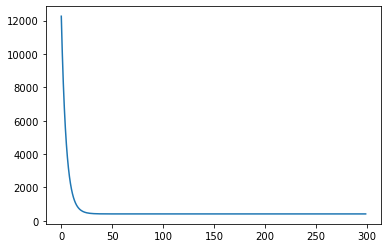

In [78]:
start = time.time()
theta, error_list  = gradient_descent(X_Train,Y_Train)
end = time.time()
print("Time taken: ",end-start)
print(theta)
print(error_list)

plt.plot(error_list)
plt.show()

In [80]:
n = X_Test.shape[0]
Y_Pred = []

for i in range(n):
    p = int(hypothesis(X_Test[i],theta))
    Y_Pred.append(p)
    
print(len(Y_Pred))
print(Y_Pred)

400
[112, 115, -25, -47, -102, -50, -81, 20, 172, 170, -111, -25, -8, 120, 35, 41, -199, 17, 8, 133, 61, -68, -114, -12, -64, 7, 23, 104, 19, -31, 107, -51, 215, -20, -238, 152, -8, 9, -318, 73, -88, -214, -248, 132, -80, 101, -9, 14, -104, -33, 7, -184, 60, -105, -112, -163, 59, 105, -79, 38, 36, -56, 162, 38, 52, 19, 78, -7, -8, -3, -27, 160, -46, 18, -72, -76, 33, -168, -6, 149, -43, -127, -201, 33, 144, 272, -266, -96, 74, -96, -54, 122, -171, -123, 46, 94, -224, -128, -181, -57, 125, -90, -7, -5, -4, 77, 40, 89, -34, -91, 35, 14, 114, 2, 70, 28, -149, 2, 17, -27, -25, -265, 266, 154, 10, 81, -16, -160, 109, -37, -224, 118, -34, -92, 168, 34, -23, 56, 41, -183, 127, -79, 211, 133, -4, -160, -19, 131, 32, 53, -9, -48, 14, -74, 24, 140, 347, 215, 23, -43, -179, 8, 299, 71, -27, 154, -163, 140, 169, -52, 61, 94, 91, 28, 172, -157, -99, -176, -23, -113, -18, -64, -81, 63, -75, 86, -62, -115, -83, 185, -46, 218, -62, -89, 44, -5, 68, -66, 208, -146, -103, -122, 21, 50, 148, 42, 89, 170,

In [82]:
# Saving File
df = pd.DataFrame(data=Y_Pred,columns=["target"])
df.to_csv("Pred.csv")